### Como usar correlação no **Python**

### Introdução

Quando você está analisando um conjunto de dados podem haver vários tipos de relacionamentos entre suas variáveis. Além disso, é importante descobrir e quantificar o grau em que as variáveis em seu conjunto de dados podem depender umas das outras. Esse conhecimento pode ajudá-lo a preparar melhor seus dados para atender às expectativas dos algoritmos de aprendizado de máquina, como a regressão linear, cujo desempenho piora quando tem várias preditoras correlacionadas.

Neste breve tutorial, vamos tratar de algund que correlação é o resumo estatístico do relacionamento entre variáveis e como calculá-lo para diferentes tipos de variáveis e relacionamentos.

Neste breve tutorial, você aprenderá:

* Como calcular uma matriz de covariância para resumir a relação linear entre duas ou mais variáveis.
* Como calcular o coeficiente de correlação de Pearson para resumir a relação linear entre duas variáveis.
* Como calcular o coeficiente de correlação de Spearman para resumir a relação monotônica entre duas variáveis.

### Visão geral do tutorial

Este tutorial está dividido em 5 partes; eles são:

1. O que é correlação?
2. Dataset de teste
3. Covariância
4. Correlação de Pearson
5. Correlação de Spearman

### O que é correlação?

Variáveis dentro de um conjunto de dados podem ser relacionadas por vários motivos.

Por exemplo:

Uma variável pode causar ou depender dos valores de outra variável.
Uma variável pode ser levemente associada a outra variável.
Duas variáveis podem depender de uma terceira variável desconhecida.
Pode ser útil na análise e modelagem de dados entender melhor as relações entre as variáveis. A relação estatística entre duas variáveis é referida como sua correlação.

Uma correlação pode ser positiva, o que significa que ambas as variáveis se movem na mesma direção ou são negativas, o que significa que quando o valor de uma variável aumenta, os valores das outras variáveis diminuem. A correlação também pode ser neural ou zero, o que significa que as variáveis não são relacionadas

* Correlação positiva: ambas as variáveis ​​mudam na mesma direção.
* Correlação Neutra: Nenhuma relação na mudança das variáveis.
* Correlação Negativa: as variáveis ​​mudam em direções opostas.

O desempenho de alguns algoritmos pode se deteriorar se duas ou mais variáveis estiverem intimamente relacionadas, chamadas de multicolinearidade. Um exemplo é a regressão linear, em que uma das variáveis correlacionadas ofensivas deve ser removida para melhorar a habilidade do modelo.

Também podemos estar interessados na correlação entre as variáveis de entrada com a variável de saída para fornecer informações sobre quais variáveis podem ou não ser relevantes como entrada para o desenvolvimento de um modelo.

A estrutura da relação pode ser conhecida, e pode ser linear, ou podemos não ter ideia se existe uma relação entre duas variáveis ou qual estrutura ela pode tomar. Dependendo do que se sabe sobre o relacionamento e a distribuição das variáveis, diferentes pontuações de correlação podem ser calculadas.

Neste tutorial, veremos uma pontuação para variáveis que têm uma distribuição gaussiana e uma relação linear e outra que não assume uma distribuição e relatará qualquer relação monotônica (crescente ou decrescente).

### Dataset de teste

Antes de analisar os métodos de correlação, vamos definir um conjunto de dados que possamos usar para testar os métodos.

Nós vamos gerar 1.000 amostras de duas variáveis ​​com uma forte correlação positiva. A primeira variável será um número aleatório de uma distribuição gaussiana com uma média de 100 e um desvio padrão de 20. A segunda variável será valores da primeira variável com ruído gaussiano adicionado com uma média de 50 e um desvio padrão de 10 .

Usaremos a função randn () para gerar valores aleatórios de Gauss com uma média de 0 e um desvio padrão de 1, depois multiplicaremos os resultados pelo nosso próprio desvio padrão e adicionaremos a média para mudar os valores para o intervalo preferido.


O gerador de números pseudo-aleatórios é propagado para garantir que obtenhamos a mesma amostra de números sempre que o código for executado.

pacotes necessários:

In [2]:
# vamos gerar variaveis relacionadas
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

In [3]:
# geracao de numeros aleatorios. O ssed(1) é util pous garante a mesma semenste de numeros pseudoaleatorios, assim você poderá repsroduzir os meus resultados
seed(1)

In [4]:
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)

In [5]:
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


Text(0.5,1,'scatter')

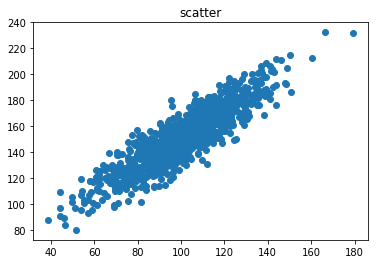

In [7]:
# plot- estamos fazendo nosso primeiro scatterplot(grafico de dispersão)
pyplot.scatter(data1, data2)
pyplot.title('scatter')

Um gráfico de dispersão das duas variáveis ​​é criado. Porque planejamos o conjunto de dados, sabemos que existe uma relação entre as duas variáveis. Isso fica claro quando analisamos o gráfico de dispersão gerado, no qual podemos ver uma tendência crescente.

Antes de olharmos para o cálculo de algumas pontuações de correlação, vamos primeiro olhar para um bloco de construção estatístico importante, chamado covariância.

#### Covariância


As variáveis podem ser relacionadas por um relacionamento linear. Esse é um relacionamento consistentemente aditivo entre as duas amostras de dados.

Essa relação pode ser resumida entre duas variáveis, chamada de covariância. É calculado como a média do produto entre os valores de cada amostra, onde os valores foram centralizados (tiveram sua média subtraída).

O cálculo da covariância da amostra é o seguinte:

cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y))) * 1/(n-1)